# CBCM clustering of companies
The objective is to cluster companies into two (or more) distinct groups.

In [1]:
#191128
import os, pickle
import pandas as pd
import numpy as np

base_path='/home/op/kernel/thesis/data/cbm/transactions/'
base_path='C:/Users/Kinga/OneDrive/thesis/data/cbm/transactions/'
df_in = pd.read_excel(base_path+'DatasetVersion0619Oskar.xlsx',encoding='utf-8')
print(df_in.columns)
df_in

Index(['TransactionID', 'Date of transaction', 'Acquiring Company (AC) name ',
       'Location RO AC', 'AC: Secondary RO', 'AC National registration number',
       'AC Company form', 'AC Sector', 'AC NACE Code',
       'Merging Company (MC) name', 'MC company form',
       'National Reg. Number MC', 'Loccation RO MC', 'MC: Secondary RO',
       'AC Company group?', 'AC Name company group',
       'AC Countries in which the group has establishments'],
      dtype='object')


,TransactionID,Date of transaction,Acquiring Company (AC) name,Location RO AC,AC: Secondary RO,AC National registration number,AC Company form,AC Sector,AC NACE Code,Merging Company (MC) name,MC company form,National Reg. Number MC,Loccation RO MC,MC: Secondary RO,AC Company group?,AC Name company group,AC Countries in which the group has establishments
0,1,2013-04-26 00:00:00,Immobilaire Effetti S.R.L.,IT,NaN,12326610156,Private limited - S.r.l.,L - Real estate activities,6820,Luforden B.V.,Private limited - BV,34133975,NL,NaN,yes,DAIDALOS S.R.L.,IT
1,2,2017-10-24 00:00:00,ABN AMRO Commercial Finance Holding B.V.,NL,NaN,24263820,Private limited - BV,K - Financial and insurance activities,6420,ABN AMRO Commercial Finance Plc,Public limited - PLC,02281768,UK,NaN,NaN,NaN,NaN
2,3,2013-05-14 00:00:00,Pathé Holding B.V.,NL,NaN,324286826,Private limited - BV,K - Financial and insurance activities,6420,Chargetex 28 S.A.S,Public limited - SAS,405 271 08,FR,NaN,yes,Les Cin Mas Gaumont Path S.A.S.,NaN
3,4,2013-05-14 00:00:00,Eclisse S.r.l.,IT,NaN,451847,Private limited - S.r.l.,"M - Professional, scientific and technical act...",7010,Calliope Holding B.V,Private limited - BV,34120120,NL,NaN,yes,NaN,NaN
4,6,2013-05-21 00:00:00,Oblio International B.V.,NL,NaN,51229048,Private limited - BV,K - Financial and insurance activities,6420,″SPI International Polska″ Spółka z ograniczon...,Private limited - (sp.) z.o.o.,126000,PL,NaN,no,NaN,-
5,7,2013-07-03 00:00:00,Acems B.V.,NL,NaN,5148945,Private limited - BV,K - Financial and insurance activities,6420,Acems AB,Private limited - AB,556654-1107,SE,NaN,yes,Ahlstrom Capacity OY,"CN, CH, DE, EE, FI, HK, NL, NO, RO, SE, SK, TR"
6,8,2013-05-27 00:00:00,Virvi B.V.,NL,NaN,56597428,Private limited - BV,K - Financial and insurance activities,6420,Virvi S.A.,Public limited - SA,B 161963,LU,NaN,no,NaN,-
7,9,2013-01-04 00:00:00,SI Trading Netherlands B.V.,NL,NaN,34252638,Private limited - BV,n.a.,n.a.,Kvazar-Micro International Limited,Private limited - Ltd.,3975973,UK,NaN,no,NaN,-
8,10,2013-01-04 00:00:00,Euro Choice II (Lux/Delaware) S.àr.l,LU,NaN,B 105.499 (NL*110021273822?),Private limited - S.a.r.l.,n.a.,n.a.,Euro Choice II B.V,Private limited - BV,34192182,NL,NaN,no,-,LU
9,11,2013-01-07 00:00:00,Crystal Capital Nederland B.V.,NL,NaN,33239617,Private limited - BV,K - Financial and insurance activities,6420,Crystal Capital GmbH,Private limited - GmbH,HRB 95153,DE,NaN,no,NaN,-


## Data cleaning
replacing badly inputted values and dropping missing values

In [2]:
#pick relevant columns
df1 = df_in[['TransactionID','AC Sector','AC NACE Code']]
#clean cell values
df1 = df1.replace('J - Information and communication','J - Information and Communication')
df1 = df1.replace(' G - Wholesale and retail trade; repair of motor vehicles and motorcycles','G - Wholesale and retail trade; repair of motor vehicles and motorcycles')
df1 = df1.replace('n.a.',np.NaN).dropna(axis=0, how='any')
df = df1.set_index('TransactionID')
#count occurances
df.groupby('AC Sector')['AC Sector'].count()

AC Sector
A - Agriculture, forestry and fishing                                          7
B - Mining and quarrying                                                      24
C - Manufacturing                                                            325
D - Electricity, gas, steam and air conditioning supply                       29
E - Water supply; sewerage, waste management and remediation activities        6
F - Construction                                                              47
G - Wholesale and retail trade; repair of motor vehicles and motorcycles     533
H - Transportation and storage                                                52
I - Accommodation and food service activities                                 25
J - Information and Communication                                            153
K - Financial and insurance activities                                      1027
L - Real estate activities                                                   248
M - Professional, 

## Dimensionality reduction and clustering

In [3]:
#OneHot encode cathegoricals
df_onehot = pd.get_dummies(df)
x = df_onehot.to_numpy()

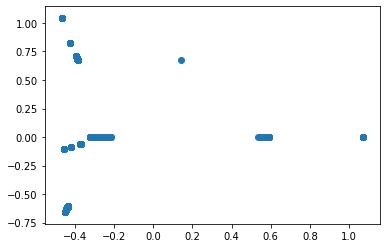

In [6]:
#run PCA to find most important distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca.fit(x)
X = pca.transform(x)
# plot
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

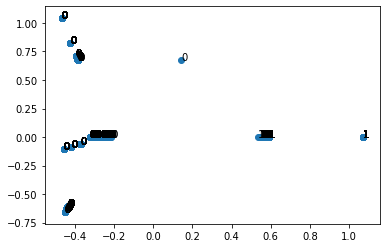

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans.labels_

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

for i, txt in enumerate(kmeans.labels_):
    ax.annotate(txt, (X[i,0], X[i,1]))
#plt.savefig('countries.png')

In [107]:
#label assignment
df_clustered = df.copy()
#['cluster']=pd.Series(kmeans.labels_)
df_clustered['cluster']=np.NaN
for i, (index, label) in enumerate(zip(df.index, kmeans.labels_)):
    df_clustered.at[index, 'cluster']=int(label)
df_clustered

,AC Sector,AC NACE Code,cluster
TransactionID,,,
1,L - Real estate activities,6820,0.0
2,K - Financial and insurance activities,6420,1.0
3,K - Financial and insurance activities,6420,1.0
4,"M - Professional, scientific and technical act...",7010,0.0
6,K - Financial and insurance activities,6420,1.0
7,K - Financial and insurance activities,6420,1.0
8,K - Financial and insurance activities,6420,1.0
11,K - Financial and insurance activities,6420,1.0
12,K - Financial and insurance activities,6420,1.0


In [140]:
df_clustered.groupby('AC NACE Code')['cluster'].mean()

AC NACE Code
64       1.0
68       0.0
610      0.0
812      0.0
1042     0.0
1051     0.0
1052     0.0
1061     0.0
1082     0.0
1084     0.0
1085     0.0
1086     0.0
1089     0.0
1090     0.0
1091     0.0
1101     0.0
1102     0.0
1107     0.0
1310     0.0
1320     0.0
1330     0.0
1392     0.0
1393     0.0
1396     0.0
1399     0.0
1410     0.0
1413     0.0
1419     0.0
1511     0.0
1520     0.0
        ... 
8291     0.0
8299     0.0
8412     0.0
8532     0.0
8552     0.0
8559     0.0
8690     0.0
9101     0.0
9200     0.0
9271     0.0
9313     0.0
9319     0.0
9329     0.0
9499     0.0
9602     0.0
9604     0.0
9609     0.0
42439    0.0
0111     0.0
0146     0.0
0164     0.0
0240     0.0
0311     0.0
0610     0.0
0729     0.0
0892     0.0
0899     0.0
0910     0.0
0990     0.0
4618     0.0
Name: cluster, Length: 376, dtype: float64

In [143]:
df_nace = pd.concat([pd.DataFrame(df_clustered.groupby('AC NACE Code')['cluster'].count()).rename(columns={'cluster':'count'}),
                     pd.DataFrame(df_clustered.groupby('AC NACE Code')['cluster'].mean()).rename(columns={'cluster':'mean'})], axis=1)
df_nace.sort_values('count', ascending=False)
#df_nace.sort_values('cluster', ascending=False)

,count,mean
AC NACE Code,,
6420,553,0.998192
8290,211,0.000000
7010,198,0.000000
8299,132,0.000000
6820,107,0.000000
7022,103,0.000000
6419,93,1.000000
6500,71,1.000000
6499,63,1.000000


In [ ]:
df_clustered.groupby('AC Sector')['cluster'].mean()